Comparison Of ALGORTIHMS to check accurate performance & selection 

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}


In [8]:
df = pd.read_csv("C:\ML Projects\ML datasets\insurancecharges.csv")


<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\shaun\AppData\Local\Temp\ipykernel_18836\4082084960.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("C:\ML Projects\ML datasets\insurancecharges.csv")


In [9]:
print(df.head())
print(df.columns)
print(df.info())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [11]:
X = df.drop('charges', axis=1)
y = df['charges']


In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define categorical and numerical columns
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

# Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

# Full pipeline
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', LinearRegression())
])

In [17]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Bin the charges into 3 categories: low, medium, high
y_binned = pd.qcut(y, q=3, labels=["Low", "Medium", "High"])

print(" Model Comparison Results (Accuracy from 5-Fold CV):\n")
for name, model in models.items():
    scores = cross_val_score(model, X_transformed, y_binned, cv=5, scoring='accuracy')
    print(f"{name:<25}: Mean = {np.mean(scores):.4f} | Std = {np.std(scores):.4f}")


 Model Comparison Results (Accuracy from 5-Fold CV):

Logistic Regression      : Mean = 0.8423 | Std = 0.0216
Decision Tree            : Mean = 0.8259 | Std = 0.0240
Random Forest            : Mean = 0.8931 | Std = 0.0125
Support Vector Machine   : Mean = 0.8864 | Std = 0.0093
Naive Bayes              : Mean = 0.8363 | Std = 0.0196
K-Nearest Neighbors      : Mean = 0.8266 | Std = 0.0180


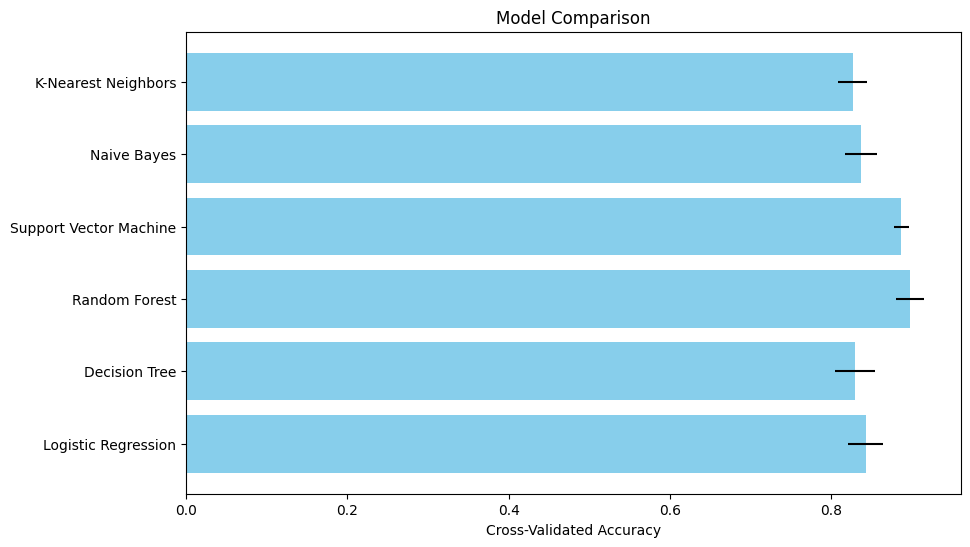

In [19]:
import matplotlib.pyplot as plt

mean_scores = []
std_scores = []

for model in models.values():
    scores = cross_val_score(model, X_transformed, y_binned, cv=5, scoring='accuracy')
    mean_scores.append(scores.mean())
    std_scores.append(scores.std())

model_names = list(models.keys())

plt.figure(figsize=(10,6))
plt.barh(model_names, mean_scores, xerr=std_scores, color='skyblue')
plt.xlabel("Cross-Validated Accuracy")
plt.title("Model Comparison")
plt.show()
